In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df_results = pd.read_csv("/results/full_results_featno.csv", index_col=0)

In [5]:
df_results

,key,mse_A549,mse_K562,mse_MCF7,css_A549,css_K562,css_MCF7,r2_A549,r2_K562,r2_MCF7,...,rank_logfc_MCF7,edistance_A549,edistance_K562,edistance_MCF7,logfc_corr_A549,logfc_corr_K562,logfc_corr_MCF7,top_logfc_corr_A549,top_logfc_corr_K562,top_logfc_corr_MCF7
0,null_500_hvg,0.002327,0.003070,0.002433,0.931026,0.937328,0.924317,0.860587,0.830771,0.869861,...,0.464715,2.326914,3.070333,2.433338,0.303523,0.205519,0.219085,0.217088,0.132075,0.221653
1,mean_500_hvg,0.001980,0.002240,0.002250,0.943127,0.953206,0.936015,0.886277,0.877916,0.894586,...,0.500000,1.979768,2.239554,2.250188,0.531066,0.473062,0.538221,0.543020,0.393115,0.628642
2,decoder_500_hvg,0.001511,0.002617,0.001641,0.956847,0.955084,0.954993,0.906319,0.855970,0.897646,...,0.493994,1.511314,2.617257,1.640940,0.509060,0.448183,0.464579,0.456152,0.444223,0.508680
3,mlp_500_hvg,0.001403,0.001753,0.001434,0.958613,0.962661,0.958666,0.912385,0.904091,0.900101,...,0.483483,1.402776,1.753229,1.434359,0.513716,0.473747,0.470080,0.460706,0.461857,0.539699
4,prnet_500_hvg,0.002057,0.002712,0.002153,0.937006,0.943324,0.934773,0.873700,0.850032,0.877180,...,0.454204,2.056550,2.711526,2.152934,0.479654,0.413362,0.492455,0.500168,0.356337,0.578506
5,null_1000_hvg,0.001953,0.002368,0.001394,0.943206,0.940596,0.928702,0.858847,0.838391,0.873087,...,0.457958,3.906493,4.735933,2.788992,0.298611,0.236802,0.229336,0.204916,0.177651,0.161867
6,mean_1000_hvg,0.001601,0.001699,0.001257,0.952098,0.955790,0.939873,0.881419,0.882099,0.899655,...,0.500000,3.202551,3.398602,2.513888,0.497864,0.468954,0.517274,0.544115,0.434709,0.532173
7,decoder_1000_hvg,0.001165,0.001462,0.000850,0.964563,0.962050,0.958717,0.917587,0.900590,0.907874,...,0.436186,2.330116,2.924359,1.700116,0.510042,0.522836,0.498205,0.540224,0.499152,0.507011
8,mlp_1000_hvg,0.001020,0.001343,0.000759,0.967535,0.964407,0.957173,0.928426,0.909661,0.898741,...,0.478228,2.039568,2.686676,1.518190,0.519010,0.449697,0.453923,0.577421,0.467226,0.433261
9,prnet_1000_hvg,0.001955,0.005514,0.001310,0.940247,0.868517,0.925569,0.863732,0.634121,0.860790,...,0.430180,3.910684,11.027193,2.619383,0.439376,0.411549,0.465206,0.496410,0.389023,0.478365


In [35]:
def plot_nofeatures(df_results, metric):
    df = df_results[['key', f'{metric}_A549', f'{metric}_K562', f'{metric}_MCF7']]
    df['no_features'] = [x.split("_")[1] for x in df['key']]
    df['model_name'] = [x.split("_")[0] for x in df['key']]

    df_melted = df.melt(
        id_vars=["no_features", "model_name"],
        value_vars=[f'{metric}_A549', f'{metric}_K562', f'{metric}_MCF7'],
        var_name="cell_type",
        value_name=f"{metric}_score")

    feature_order = ['500', '1000', '2000', '3500', '5000', '7500']
    df_avg = df_melted.groupby(["model_name", "no_features"], as_index=False)[f"{metric}_score"].mean()
    df_avg["no_features"] = pd.Categorical(df_avg["no_features"], categories=feature_order, ordered=True)

    # Map categorical 'no_features' to numeric positions for jittering
    x_positions = {val: i for i, val in enumerate(feature_order)}
    df_avg["x_jitter"] = df_avg["no_features"].map(x_positions).astype(float)

    # Apply small random jitter within each x category
    jitter_strength = 0.1
    np.random.seed(42)  # for reproducibility
    df_avg["x_jitter"] += np.random.uniform(-jitter_strength, jitter_strength, size=len(df_avg))

    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        data=df_avg,
        x="x_jitter",
        y=f"{metric}_score",
        hue="model_name",
        style="model_name",
        markers=True,
        s=100
    )

    # Set custom x-ticks and labels
    plt.xticks(ticks=range(len(feature_order)), labels=feature_order)
    plt.xlabel("Number of Features")
    plt.ylabel(f"{metric}")
    plt.legend(title="Model", loc="lower left")
    plt.tight_layout()
    plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_23204\3905935706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_features'] = [x.split("_")[1] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_23204\3905935706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_name'] = [x.split("_")[0] for x in df['key']]


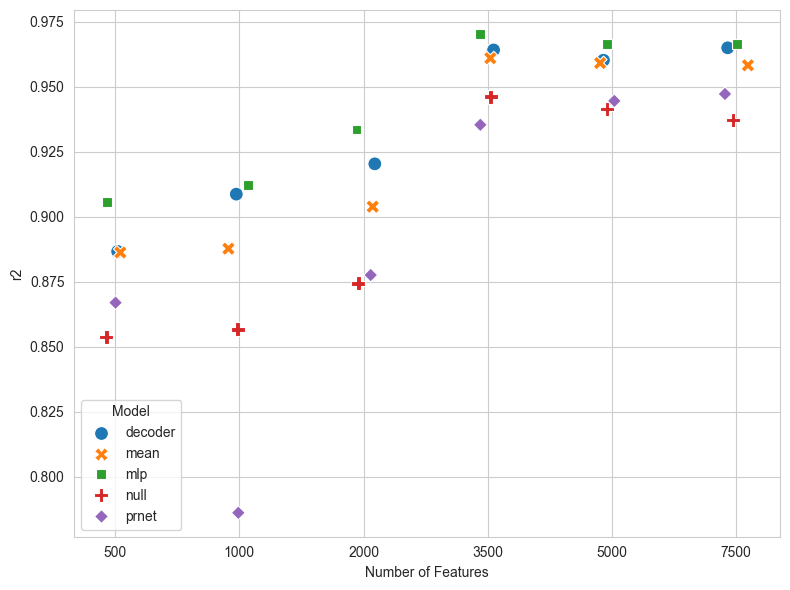

In [36]:
plot_nofeatures(df_results, 'r2')

C:\Users\admin\AppData\Local\Temp\ipykernel_23204\3905935706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_features'] = [x.split("_")[1] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_23204\3905935706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_name'] = [x.split("_")[0] for x in df['key']]


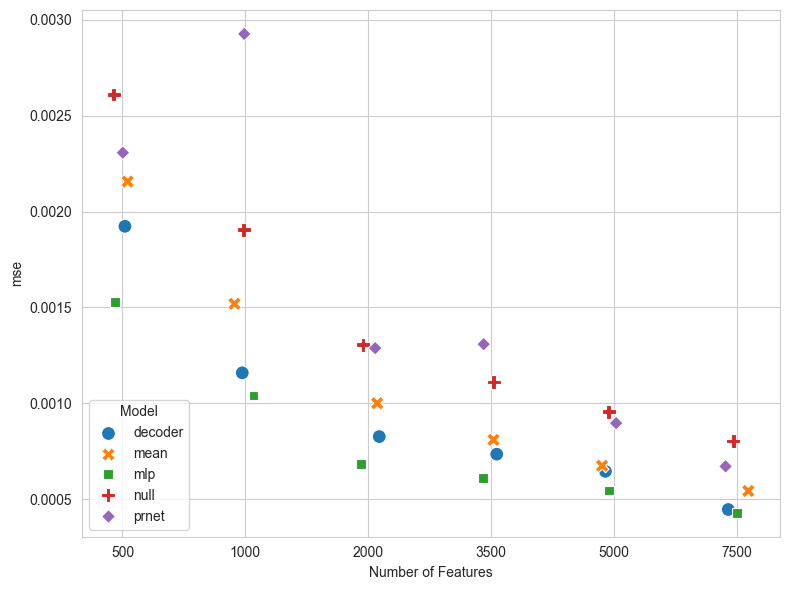

In [37]:
plot_nofeatures(df_results, 'mse')

C:\Users\admin\AppData\Local\Temp\ipykernel_23204\3905935706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_features'] = [x.split("_")[1] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_23204\3905935706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_name'] = [x.split("_")[0] for x in df['key']]


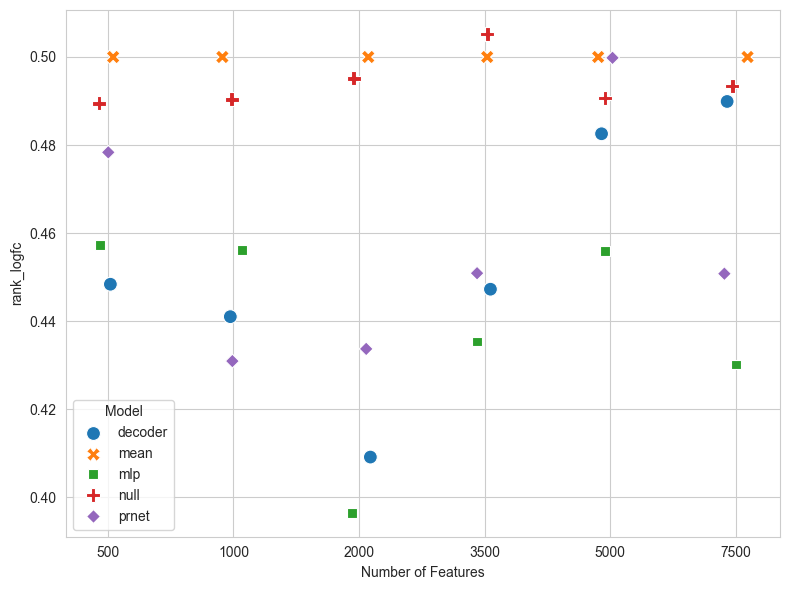

In [38]:
plot_nofeatures(df_results, 'rank_logfc')

C:\Users\admin\AppData\Local\Temp\ipykernel_23204\3905935706.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['no_features'] = [x.split("_")[1] for x in df['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_23204\3905935706.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['model_name'] = [x.split("_")[0] for x in df['key']]


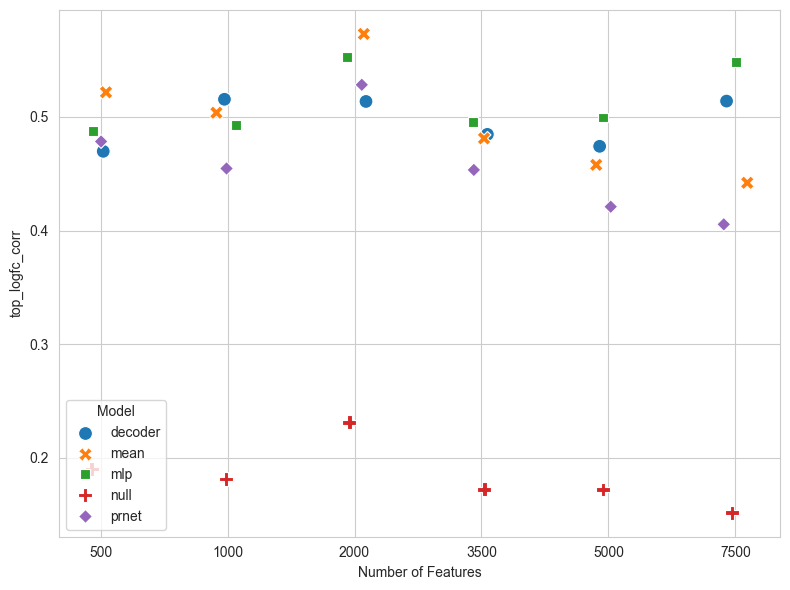

In [39]:
plot_nofeatures(df_results, 'top_logfc_corr')

In [29]:
df_toplogfc_corr = df_results[['key', 'top_logfc_corr_A549', 'top_logfc_corr_K562', 'top_logfc_corr_MCF7']]
df_toplogfc_corr['no_features'] = [x.split("_")[1] for x in df_toplogfc_corr['key']]
df_toplogfc_corr['model_name'] = [x.split("_")[0] for x in df_toplogfc_corr['key']]

C:\Users\admin\AppData\Local\Temp\ipykernel_4832\2142325898.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toplogfc_corr['no_features'] = [x.split("_")[1] for x in df_toplogfc_corr['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_4832\2142325898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_toplogfc_corr['model_name'] = [x.split("_")[0] for x in df_toplogfc_corr['key']]


In [30]:
df_melted = df_toplogfc_corr.melt(
    id_vars=["no_features", "model_name"],
    value_vars=["top_logfc_corr_A549", "top_logfc_corr_K562", "top_logfc_corr_MCF7"],
    var_name="cell_type",
    value_name="top_logfc_corr"
)

df_melted["cell_type"] = df_melted["cell_type"].str.replace("top_logfc_corr", "")

In [31]:
feature_order = ['500', '1000', '2000', '3500', '5000', '7500']
df_avg = df_melted.groupby(["model_name", "no_features"], as_index=False)["top_logfc_corr"].mean()

df_avg["no_features"] = pd.Categorical(df_avg["no_features"], categories=feature_order, ordered=True)

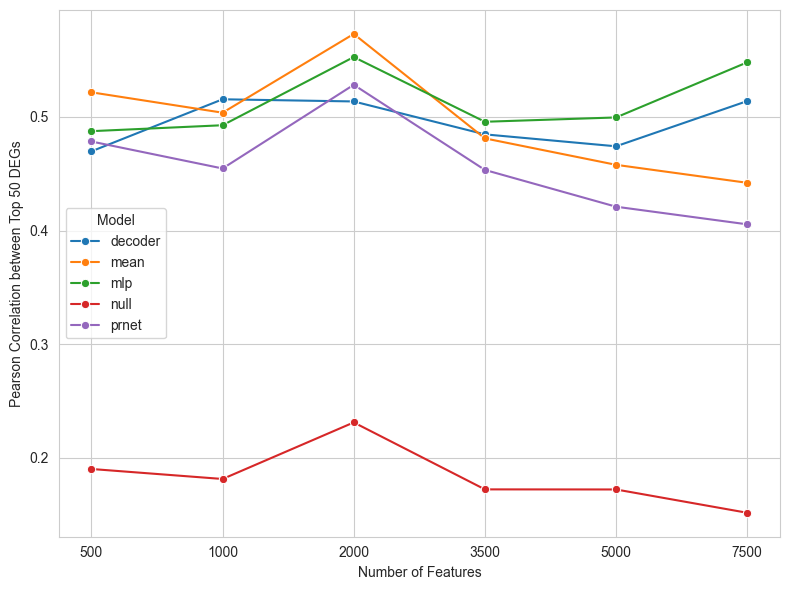

In [32]:

plt.figure(figsize=(8, 6))
sns.lineplot(
    data=df_avg,
    x="no_features",
    y="top_logfc_corr",
    hue="model_name",
    marker="o"
)

plt.xlabel("Number of Features")
plt.ylabel("Pearson Correlation between Top 50 DEGs")
plt.legend(title="Model")
plt.tight_layout()
plt.show()

In [34]:
df_mse = df_results[['key', 'mse_A549', 'mse_K562', 'mse_MCF7']]
df_mse['no_features'] = [x.split("_")[1] for x in df_mse['key']]
df_mse['model_name'] = [x.split("_")[0] for x in df_mse['key']]

C:\Users\admin\AppData\Local\Temp\ipykernel_4832\2593013026.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mse['no_features'] = [x.split("_")[1] for x in df_mse['key']]
C:\Users\admin\AppData\Local\Temp\ipykernel_4832\2593013026.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mse['model_name'] = [x.split("_")[0] for x in df_mse['key']]


In [35]:
df_melted_mse = df_mse.melt(
    id_vars=["no_features", "model_name"],
    value_vars=["mse_A549", "mse_K562", "mse_MCF7"],
    var_name="cell_type",
    value_name="mse"
)

df_melted_mse["cell_type"] = df_melted_mse["cell_type"].str.replace("mse_", "")

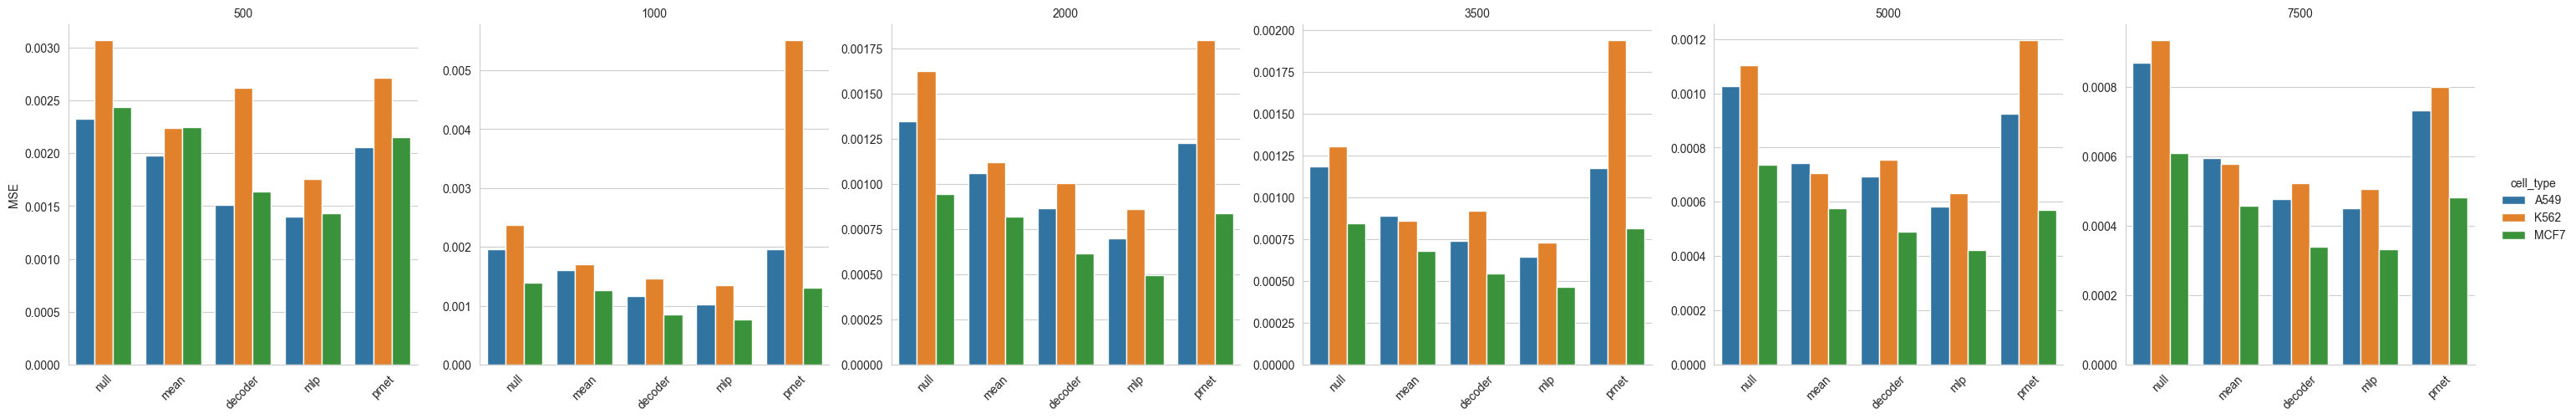

In [38]:
g = sns.catplot(
    data=df_melted_mse,
    x="model_name",
    y="mse",
    hue="cell_type",
    col="no_features",
    kind="bar",
    height=5,
    aspect=1,
    sharey=False,
)
g.set_titles("{col_name}")
g.set_axis_labels("", "MSE")
g.set_xticklabels(rotation=45)
plt.show()